# Principal Component Analysis

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Step 1 - Dataset creation

In [5]:
# Sample set no. 1
mu_vec1 = np.array([0,0,0]) # sample mean
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]]) # sample covariance
sample_set1 = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

In [6]:
print("Sample set no.1 - matrix " + str(sample_set1.shape) + ":\n" + str(sample_set1) + "\n")

Sample set no.1 - matrix (3, 20):
[[  3.63013344e-01  -5.85423529e-01  -1.07680019e+00   9.54772692e-02
   -2.30655915e-01   7.55504247e-01   4.57122593e-01  -9.94646152e-01
   -7.66104363e-01  -1.55153825e+00   1.10783634e+00  -4.01267993e-01
   -2.51177343e-03   1.11125471e-01  -1.58393093e+00   7.99811567e-01
   -5.84061338e-01   3.02150440e-01   1.19809694e+00   5.25678260e-01]
 [  1.07578927e-01  -1.87667311e+00   5.49377349e-01   5.21798873e-01
   -1.37510167e-01  -1.65288857e+00   5.01359779e-01  -1.45269635e+00
    3.07968988e-01   1.64247795e+00   4.56875314e-01  -9.37888563e-01
    5.28154519e-01   4.49028096e-01  -5.76529882e-01  -8.34397818e-01
    5.41998668e-01   2.73776507e+00  -1.85310858e+00  -1.27904804e-01]
 [ -7.80997068e-01   1.83433264e-01  -1.36263383e+00  -8.81517242e-01
   -5.94513185e-02  -1.63284246e+00  -3.44821004e-01  -8.89063653e-01
    1.13694068e+00   5.01103079e-01   1.53643188e+00   1.46534627e+00
    4.85863143e-01   5.10361893e-01  -6.90484239e-01  

In [7]:
# Checking if mean of set1 is close to 0 according to mu_vec1
np.mean(sample_set1)

-0.014202654008908234

In [8]:
# Sample set no. 2
mu_vec2 = np.array([1,1,1]) # sample mean
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]]) # sample covariance
sample_set2 = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

In [9]:
print("Sample set no.2 - matrix " + str(sample_set2.shape) + ":\n" + str(sample_set2))

Sample set no.2 - matrix (3, 20):
[[-1.20009602 -0.64274209 -0.05320558  0.38957269  2.71032577  1.07104316
   0.36640645  0.73140236  1.64574553  0.66906712  1.10074676  0.75808388
   3.32257181  1.63849431  0.75058464  0.33831835  0.19599671  2.03908085
   2.1067255   1.574935  ]
 [ 1.7498127   2.64698774 -0.41017486  0.98348913  2.19824538  1.0562711
   0.07782755  1.29947813  2.95370586  1.22177796  1.48094772  1.42413285
   0.5779653   1.64243385  2.09627378  3.07980992  2.4402616   0.47459639
   0.90170804 -0.21983408]
 [ 2.98343009  0.74483224 -0.35593608  1.74953722  1.08403136  3.02406208
   0.21793215  1.13455125  0.41685949  2.62741984  1.25108698 -0.74119518
  -0.05545041  1.65901962  1.01250177 -0.68573696  1.65138974  0.00888913
   0.13928843  0.2378505 ]]


In [10]:
# Checking if mean of set2 is close to 1 according to mu_vec2
np.mean(sample_set2)

1.088218941883603

### Step 2 - Plot Data

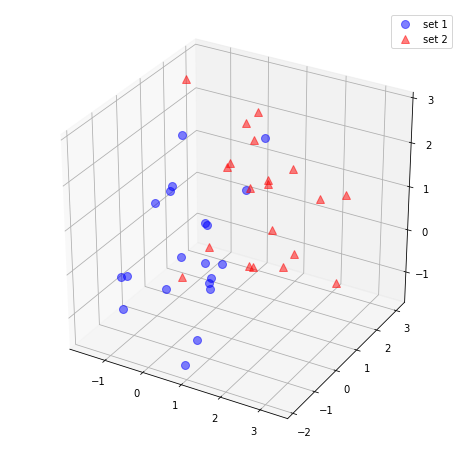

In [11]:
# Create Figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10

# Draw points of both data sets
ax.plot(sample_set1[0,:], sample_set1[1,:], sample_set1[2,:], 'o', markersize=8, color='blue', alpha=0.5, label="set 1")
ax.plot(sample_set2[0,:], sample_set2[1,:], sample_set2[2,:], '^', markersize=8, color='red', alpha=0.5, label="set 2")

# Show legend
ax.legend(loc='upper right')
plt.show()

### Step 3 - merge the data into one dataset

In [12]:
# Merging two sample sets into one
all_samples = np.concatenate((sample_set1, sample_set2), axis=1)

In [13]:
print("All_samples - matrix " + str(all_samples.shape) + ":\n" + str(all_samples))

All_samples - matrix (3, 40):
[[  3.63013344e-01  -5.85423529e-01  -1.07680019e+00   9.54772692e-02
   -2.30655915e-01   7.55504247e-01   4.57122593e-01  -9.94646152e-01
   -7.66104363e-01  -1.55153825e+00   1.10783634e+00  -4.01267993e-01
   -2.51177343e-03   1.11125471e-01  -1.58393093e+00   7.99811567e-01
   -5.84061338e-01   3.02150440e-01   1.19809694e+00   5.25678260e-01
   -1.20009602e+00  -6.42742091e-01  -5.32055839e-02   3.89572695e-01
    2.71032577e+00   1.07104316e+00   3.66406450e-01   7.31402356e-01
    1.64574553e+00   6.69067121e-01   1.10074676e+00   7.58083880e-01
    3.32257181e+00   1.63849431e+00   7.50584637e-01   3.38318346e-01
    1.95996709e-01   2.03908085e+00   2.10672550e+00   1.57493500e+00]
 [  1.07578927e-01  -1.87667311e+00   5.49377349e-01   5.21798873e-01
   -1.37510167e-01  -1.65288857e+00   5.01359779e-01  -1.45269635e+00
    3.07968988e-01   1.64247795e+00   4.56875314e-01  -9.37888563e-01
    5.28154519e-01   4.49028096e-01  -5.76529882e-01  -8.34

### Step 4 - mean normalization of each point/feature

Given data:

\begin{equation*}
 x_1, x_2, x_3, ..., x_m
\end{equation*}


Calculate data mean:

\begin{equation*}
\mu_k = \frac{1}{m}\sum_{i=1}^mx^{(i)}_k
\end{equation*}

Where:
- i - data index
- j - data row (depending on dimension)
- m - num of all data samples

Apply to each sample in data set:

\begin{equation*}
x^{(i)}_k = x_k - \mu_k
\end{equation*}  

In [31]:
all_samples = np.array([[-1, -1, 1], [-2, -1, 2], [-3, -2, 3], [1, 1, 3], [2, 1, 5], [3, 2, 7]]).T

# Calculating mean of each data dimension
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

# Creating mean vector
mean_vec = np.array([[mean_x], [mean_y], [mean_z]])

In [32]:
print(mean_vec.shape)

(3, 1)


In [33]:
# Creating mean vector
mean_vec = np.array([[mean_x], [mean_y], [mean_z]])

In [34]:
print(mean_vec)

[[ 0. ]
 [ 0. ]
 [ 3.5]]


In [35]:
# Creating matrix of same size as all samples
all_samples_normalized = np.zeros(all_samples.shape)

# # Subtracting dimension mean from each data dimension row
all_samples_normalized = all_samples - mean_vec

In [36]:
print("All_samples_normalized - matrix " + str(all_samples_normalized.shape) + ":\n" + str(all_samples_normalized))

All_samples_normalized - matrix (3, 6):
[[-1.  -2.  -3.   1.   2.   3. ]
 [-1.  -1.  -2.   1.   1.   2. ]
 [-2.5 -1.5 -0.5 -0.5  1.5  3.5]]


In [37]:
# Checking if every feature has 0 mean now
norm_mean_x = np.mean(all_samples_normalized[0,:])
norm_mean_y = np.mean(all_samples_normalized[1,:])
norm_mean_z = np.mean(all_samples_normalized[2,:])

In [38]:
print(round(norm_mean_x), round(norm_mean_y), round(norm_mean_z))

0.0 0.0 0.0


### Step 5 - Calculating Covariance Matrix

#### a) solution 1

Covariance Matrix:

\begin{equation*}
\sum = \frac{1}{m}\sum_{i=1}^m(x^{(i)})(x^{(i)})^T
\end{equation*}

Where:
- i - data index
- m - num of all data samples

In [39]:
cov_mat = (1/all_samples_normalized.shape[1]) * (all_samples_normalized.dot(all_samples_normalized.T))

In [40]:
print("Covariance matrix: \n" + str(cov_mat))

Covariance matrix: 
[[ 4.66666667  3.          3.33333333]
 [ 3.          2.          2.16666667]
 [ 3.33333333  2.16666667  3.91666667]]


#### b) solution 2

We can use numpy to calculate Covariance Matrix. Result will be slightly difference. Numpy uses scaling factor **(1/m - 1)** instead of **(1/m)**. Eigenvalues will be slightly different but eigenvectors will be the same thus reusult of both solutions will be the same in the end.

In [41]:
cov_mat = np.cov(all_samples)

In [42]:
print("Covariance matrix: \n" + str(cov_mat))

Covariance matrix: 
[[ 5.6  3.6  4. ]
 [ 3.6  2.4  2.6]
 [ 4.   2.6  4.7]]


### Step 6 - compute eigenvectors and eigenvalues

- What are eigen values and eigen vectors: http://setosa.io/ev/eigenvectors-and-eigenvalues/
- How to calculate eigen values and eigen vectors: http://www.sosmath.com/matrix/eigen1/eigen1.html

In [43]:
eig_val, eig_vec = np.linalg.eig(cov_mat)

In [44]:
print("Eigenvalues: \n" + str(eig_val))

Eigenvalues: 
[ 11.35799146   0.06045678   1.28155176]


In [45]:
print("Eigenvectors: \n" + str(eig_vec))

Eigenvectors: 
[[ -6.81568462e-01  -5.44790092e-01  -4.88536782e-01]
 [ -4.42959174e-01   8.38572416e-01  -3.17148977e-01]
 [ -5.82453090e-01  -2.43108838e-04   8.12864281e-01]]


### Step 7 - Create eigenpairs and sort in descending order

In [46]:
# Create tuples, makes vector vals positive
eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

In [47]:
eig_pairs

[(11.357991462406877, array([-0.68156846, -0.44295917, -0.58245309])),
 (0.060456775800999799,
  array([ -5.44790092e-01,   8.38572416e-01,  -2.43108838e-04])),
 (1.2815517617921368, array([-0.48853678, -0.31714898,  0.81286428]))]

In [48]:
# Sort (eigenvalues, eigenvectors) pairs with descending order
eig_pairs.sort()
eig_pairs.reverse()

In [49]:
eig_pairs

[(11.357991462406877, array([-0.68156846, -0.44295917, -0.58245309])),
 (1.2815517617921368, array([-0.48853678, -0.31714898,  0.81286428])),
 (0.060456775800999799,
  array([ -5.44790092e-01,   8.38572416e-01,  -2.43108838e-04]))]

### Step 8 - create matrix of eigenvectors

Currently our data is 3D. We have 3x3 matrix of eigenvectors. Depending on number of rows we pick - we can reduce dimensionality of our data.

From 3D to 2D - if we pick 2 rows

In [50]:
matrix_w2d = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1))).T

In [51]:
matrix_w2d

array([[-0.68156846, -0.44295917, -0.58245309],
       [-0.48853678, -0.31714898,  0.81286428]])

From 3D to 1D - if we pick 1 row

In [52]:
matrix_w1d = np.hstack((eig_pairs[0][1].reshape(3,1))).T

In [53]:
matrix_w1d

array([-0.68156846, -0.44295917, -0.58245309])

### Step 9 - Reduce data dimension

In [54]:
reduced_2d = matrix_w2d.dot(all_samples)

In [55]:
print(reduced_2d.shape)

(2, 6)


In [56]:
reduced_1d = matrix_w1d.dot(all_samples)

In [57]:
print(reduced_1d.shape)

(6,)


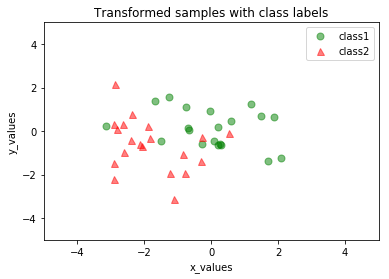

In [43]:
plt.plot(reduced_2d[0,0:20], reduced_2d[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(reduced_2d[0,20:40], reduced_2d[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()